<a href="https://colab.research.google.com/github/jmofarias/machine_learning/blob/master/cnn_cachorro_ou_gato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Redes Neurais Convolucionais (CNN)**
* Reconhecimento de imagens com redes neurais convolucionais
* [Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats/data)
* O objetivo é identificar a partir de uma imagem se é um cachorro ou gato

In [43]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Importando bibliotecas necessárias

In [44]:
import tensorflow as tf
import keras as K
import numpy as np
from IPython.display import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator


## 2. Carregando os dados

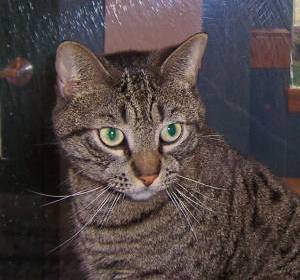

In [45]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_treino/cat.1.jpg')

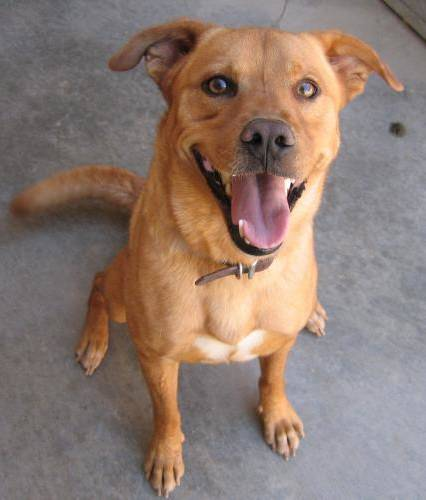

In [46]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_treino/dog.912.jpg')

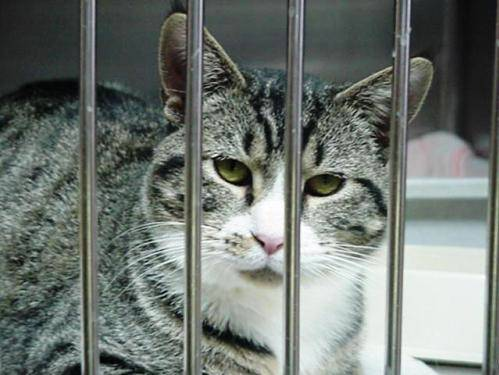

In [47]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_treino/cat.17.jpg')

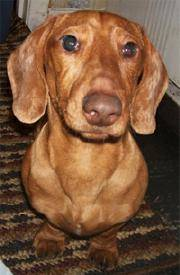

In [48]:
Image(filename='/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_treino/dog.9387.jpg')

## 3. Construção da rede neural convucional

In [49]:
# Inicializando a rede neural convolucional
classifier = Sequential()

In [50]:
# Primeira camada de convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [51]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [52]:
# Adicionando a segunda camada de convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [53]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [54]:
# Flattening
classifier.add(Flatten())

In [55]:
# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [56]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## 4. Treinamento da rede neural convolucional

In [57]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

In [ ]:
# Executando o treinamento
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 5,
                         validation_data = validation_set,
                         validation_steps = 2000)

## 5. Fazendo previsões

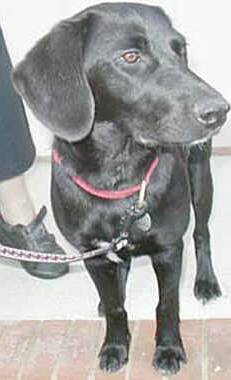

In [68]:
# Primeira imagem
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_teste/2216.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_teste/2216.jpg')

In [67]:
# Previsão da primeira imagem
prediction

'Gato'

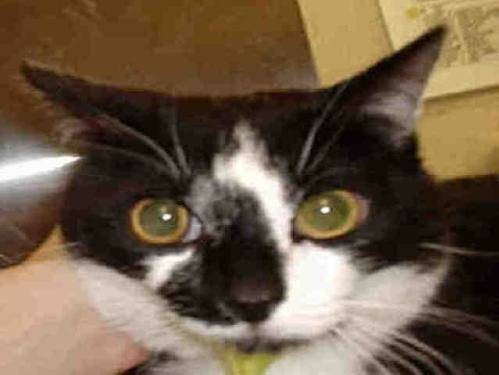

In [69]:
# Segunda imagem
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_teste/2897.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_teste/2897.jpg')

In [70]:
# Previsão da segunda imagem
prediction

'Gato'

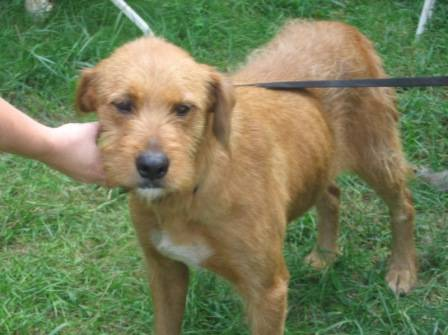

In [71]:
# Terceira imagem
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_teste/2892.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_teste/2892.jpg')

In [72]:
# Previsão da terceira imagem
prediction

'Gato'

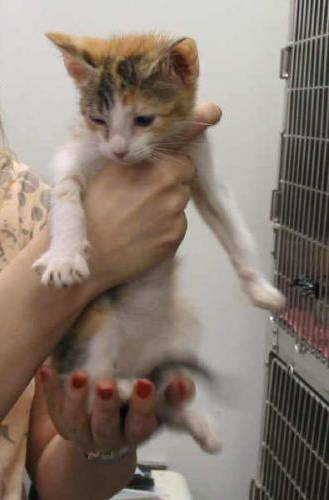

In [73]:
# Quarta imagem
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_teste/2524.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Cachorro'
else:
    prediction = 'Gato'

Image(filename='/content/drive/My Drive/Colab Notebooks/Machine_Learning/Datasets/dataset_teste/2524.jpg')

In [74]:
# Previsão da quarta imagem
prediction

'Gato'